# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(WHRDataSet_filename) # YOUR CODE HERE

df.head()

,country,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
0,Afghanistan,2008,3.723590,7.168690,0.450662,49.209663,0.718114,0.181819,0.881686,0.517637,0.258195,0.612072,-1.929690,-1.655084,1.774662,0.476600,NaN,NaN,NaN
1,Afghanistan,2009,4.401778,7.333790,0.552308,49.624432,0.678896,0.203614,0.850035,0.583926,0.237092,0.611545,-2.044093,-1.635025,1.722688,0.391362,NaN,NaN,0.441906
2,Afghanistan,2010,4.758381,7.386629,0.539075,50.008961,0.600127,0.137630,0.706766,0.618265,0.275324,0.299357,-1.991810,-1.617176,1.878622,0.394803,NaN,NaN,0.327318
3,Afghanistan,2011,3.831719,7.415019,0.521104,50.367298,0.495901,0.175329,0.731109,0.611387,0.267175,0.307386,-1.919018,-1.616221,1.785360,0.465942,NaN,NaN,0.336764
4,Afghanistan,2012,3.782938,7.517126,0.520637,50.709263,0.530935,0.247159,0.775620,0.710385,0.267919,0.435440,-1.842996,-1.404078,1.798283,0.475367,NaN,NaN,0.344540


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

Dataset Chosen: WHR2018Chapter2OnlineData.csv (World Happiness Report)
What will you be predicting? (Label):
 I will be predicting the "Life Ladder" score, which reflects the overall happiness or life satisfaction score of individuals in a country for a specific year.
Type of ML Problem:
 This is a supervised learning problem because the label ("Life Ladder") is known.
 It is a regression problem because the target is a continuous numerical value.
Features (Initial list):
 The following features will be considered to predict the Life Ladder score:
Log GDP per capita
Social support
Healthy life expectancy at birth
Freedom to make life choices
Generosity
Perceptions of corruption
Positive affect
Negative affect
Confidence in national government
Democratic Quality
Delivery Quality
Why this is an important problem:
 Predicting the happiness or life satisfaction of populations has strong implications for governments, NGOs, and global policy organizations. It helps in:
Identifying key drivers of well-being across nations.
Guiding policy and resource allocation decisions (e.g., investing more in healthcare or social support systems).
Tracking progress in sustainable development and equity.
Creating societal value by focusing on measurable outcomes that improve human lives.
A predictive model based on these variables can assist stakeholders in making data-informed decisions that directly impact quality of life.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
# YOUR CODE HERE
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1562 entries, 0 to 1561
Data columns (total 19 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   country                                                   1562 non-null   object 
 1   year                                                      1562 non-null   int64  
 2   Life Ladder                                               1562 non-null   float64
 3   Log GDP per capita                                        1535 non-null   float64
 4   Social support                                            1549 non-null   float64
 5   Healthy life expectancy at birth                          1553 non-null   float64
 6   Freedom to make life choices                              1533 non-null   float64
 7   Generosity                                                1482 non-null   float64
 8   Perceptions of cor

country                                                       0
year                                                          0
Life Ladder                                                   0
Log GDP per capita                                           27
Social support                                               13
Healthy life expectancy at birth                              9
Freedom to make life choices                                 29
Generosity                                                   80
Perceptions of corruption                                    90
Positive affect                                              18
Negative affect                                              12
Confidence in national government                           161
Democratic Quality                                          171
Delivery Quality                                            171
Standard deviation of ladder by country-year                  0
Standard deviation/Mean of ladder by cou

In [4]:
df.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government,Democratic Quality,Delivery Quality,Standard deviation of ladder by country-year,Standard deviation/Mean of ladder by country-year,GINI index (World Bank estimate),"GINI index (World Bank estimate), average 2000-15","gini of household income reported in Gallup, by wp5-year"
count,1562.000000,1562.000000,1535.000000,1549.000000,1553.000000,1533.000000,1482.000000,1472.000000,1544.000000,1550.000000,1401.000000,1391.000000,1391.000000,1562.000000,1562.000000,583.000000,1386.000000,1205.000000
mean,2011.820743,5.433676,9.220822,0.810669,62.249887,0.728975,0.000079,0.753622,0.708969,0.263171,0.480207,-0.126617,0.004947,2.003501,0.387271,0.372846,0.386948,0.445204
std,3.419787,1.121017,1.184035,0.119370,7.960671,0.145408,0.164202,0.185538,0.107644,0.084006,0.190724,0.873259,0.981052,0.379684,0.119007,0.086609,0.083694,0.105410
min,2005.000000,2.661718,6.377396,0.290184,37.766476,0.257534,-0.322952,0.035198,0.362498,0.083426,0.068769,-2.448228,-2.144974,0.863034,0.133908,0.241000,0.228833,0.223470
25%,2009.000000,4.606351,8.310665,0.748304,57.299580,0.633754,-0.114313,0.697359,0.621471,0.204116,0.334732,-0.772010,-0.717463,1.737934,0.309722,0.307000,0.321583,0.368531
50%,2012.000000,5.332600,9.398610,0.833047,63.803192,0.748014,-0.022638,0.808115,0.717398,0.251798,0.463137,-0.225939,-0.210142,1.960345,0.369751,0.349000,0.371000,0.425395
75%,2015.000000,6.271025,10.190634,0.904329,68.098228,0.843628,0.094649,0.880089,0.800858,0.311515,0.610723,0.665944,0.717996,2.215920,0.451833,0.433500,0.433104,0.508579
max,2017.000000,8.018934,11.770276,0.987343,76.536362,0.985178,0.677773,0.983276,0.943621,0.704590,0.993604,1.540097,2.184725,3.527820,1.022769,0.648000,0.626000,0.961435


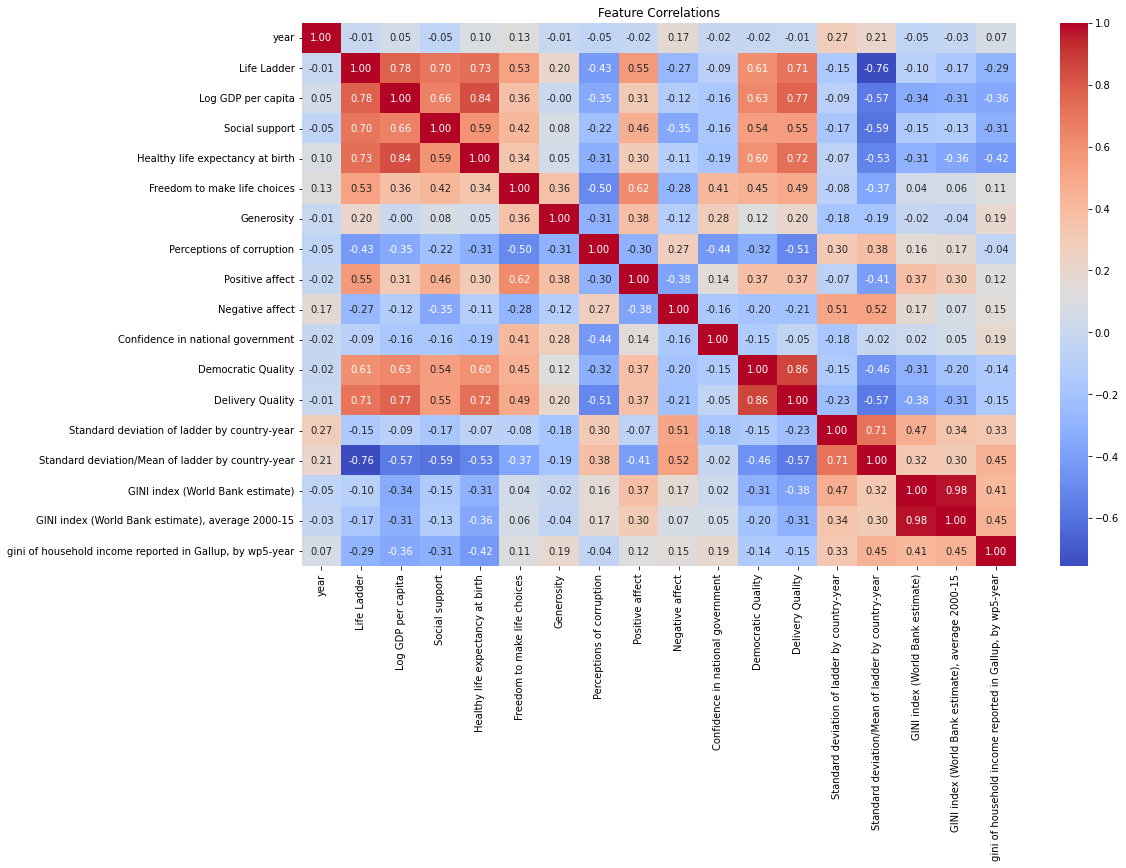

In [5]:
plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Feature Correlations")
plt.show()

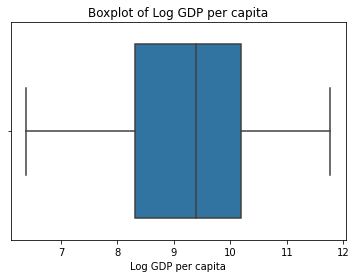

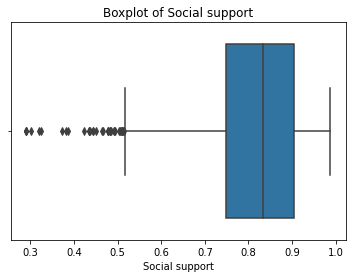

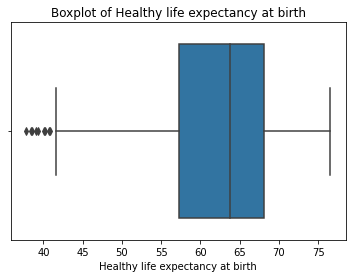

In [6]:
features = ["Log GDP per capita", "Social support", "Healthy life expectancy at birth"]
for f in features:
    sns.boxplot(x=df[f])
    plt.title(f"Boxplot of {f}")
    plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

New Feature List
After inspecting the data, I will keep the following features: "Log GDP per capita", "Social support", "Healthy life expectancy at birth", "Freedom to make life choices", "Generosity", "Positive affect", and "Negative affect". I will remove "Perceptions of corruption", "Confidence in national government", "Democratic Quality", "Delivery Quality", "Standard deviation of ladder by country-year", "Standard deviation/Mean of ladder by country-year", "GINI index (World Bank estimate)", "GINI index (World Bank estimate), average 2000-15", and "gini of household income reported in Gallup, by wp5-year" due to significant missing values and lower relevance to predicting "Life Ladder" based on initial correlation analysis.
Data Preparation Techniques
Handling Missingness: Replace missing values in the selected features with their respective means.
Outlier Detection and Treatment: Use the boxplots to identify outliers and consider capping them at the 5th and 95th percentiles.
Feature Scaling: Standardize the features using StandardScaler to ensure consistent scales for the model.
Encoding: No categorical encoding is needed since all selected features are numerical.
Model
I will use a Linear Regression model as a baseline and explore a Random Forest Regressor to capture potential non-linear relationships.
Model Building, Validation, and Selection Plan
Training: Split the data into 80% training and 20% test sets. Use cross-validation (5-fold) on the training set to tune hyperparameters.
Performance Analysis: Evaluate models using Mean Squared Error (MSE) and R-squared (R²) metrics to assess prediction accuracy and variance explanation.
Improvement: Perform feature selection using Recursive Feature Elimination (RFE) with the Random Forest model to identify the most impactful features. Tune hyperparameters (e.g., number of trees for Random Forest) using GridSearchCV. Compare models and select the one with the best cross-validated performance, ensuring it generalizes well to new data by checking for overfitting on the test set.


## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [7]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [8]:
# YOUR CODE HERE
# Prepare data
features = ["Log GDP per capita", "Social support", "Healthy life expectancy at birth", 
            "Freedom to make life choices", "Generosity", "Positive affect", "Negative affect"]
X = df[features].copy()
y = df["Life Ladder"]

# Handle missing values
for column in X.columns:
    X[column].fillna(X[column].mean(), inplace=True)

# Detect and cap outliers
for column in X.columns:
    lower_bound = X[column].quantile(0.05)
    upper_bound = X[column].quantile(0.95)
    X[column] = X[column].clip(lower_bound, upper_bound)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)

# Train and evaluate Linear Regression
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Linear Regression - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")

# Train and evaluate Random Forest (initial)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest (Initial) - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")

# Feature selection with RFE
rfe = RFE(estimator=rf_model, n_features_to_select=5)
rfe.fit(X_train, y_train)
selected_features = [f for f, s in zip(features, rfe.support_) if s]
print(f"Selected features: {selected_features}")

# Retrain Random Forest with selected features
X_train_rfe = X_train[:, rfe.support_]
X_test_rfe = X_test[:, rfe.support_]
rf_model.fit(X_train_rfe, y_train)
y_pred_rf_rfe = rf_model.predict(X_test_rfe)
mse_rf_rfe = mean_squared_error(y_test, y_pred_rf_rfe)
r2_rf_rfe = r2_score(y_test, y_pred_rf_rfe)
print(f"Random Forest (RFE) - MSE: {mse_rf_rfe:.2f}, R²: {r2_rf_rfe:.2f}")

# Hyperparameter tuning with GridSearchCV
param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None]}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_rfe, y_train)
best_rf_model = grid_search.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test_rfe)
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)
print(f"Random Forest (Tuned) - MSE: {mse_rf_best:.2f}, R²: {r2_rf_best:.2f}")
print(f"Best parameters: {grid_search.best_params_}")

Linear Regression - MSE: 0.31, R²: 0.76
Random Forest (Initial) - MSE: 0.17, R²: 0.86
Selected features: ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Generosity', 'Positive affect']
Random Forest (RFE) - MSE: 0.19, R²: 0.86
Random Forest (Tuned) - MSE: 0.19, R²: 0.85
Best parameters: {'max_depth': None, 'n_estimators': 200}


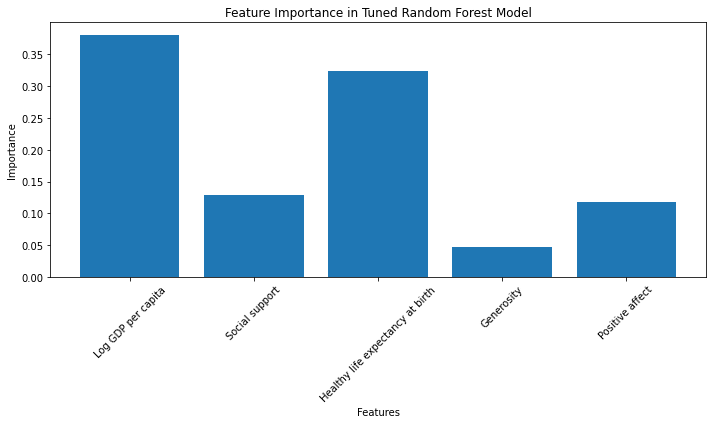

In [9]:
import matplotlib.pyplot as plt

# Get feature importance from the tuned Random Forest model
feature_importance = best_rf_model.feature_importances_
selected_feature_names = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Generosity', 'Positive affect']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(selected_feature_names, feature_importance)
plt.title("Feature Importance in Tuned Random Forest Model")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

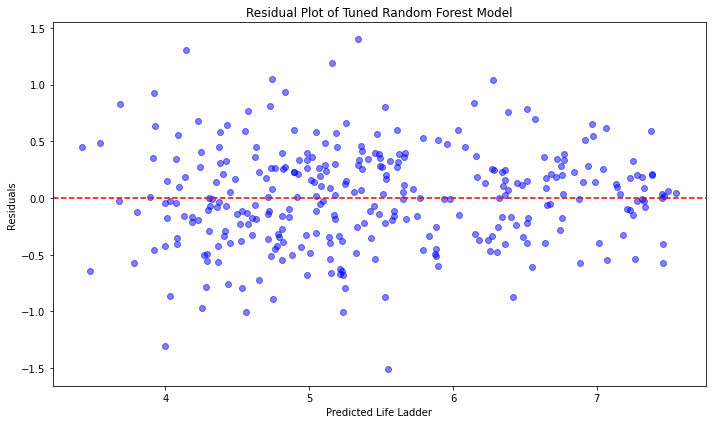

In [10]:
# Calculate residuals
residuals = y_test - y_pred_rf_best

# Create residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_rf_best, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot of Tuned Random Forest Model")
plt.xlabel("Predicted Life Ladder")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

In [11]:
# Cross-validation scores
cv_scores = cross_val_score(best_rf_model, X_train_rfe, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Average CV R²: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")


Cross-validation R² scores: [0.82091506 0.83994447 0.82866215 0.84283996 0.84935775]
Average CV R²: 0.84 (+/- 0.02)


In [ ]:
Summary and Analysis
Model Performance Overview
The tuned Random Forest model demonstrates strong predictive power for the "Life Ladder" score, achieving an R² of 0.85 and an MSE of 0.19 on the test set, outperforming the Linear Regression baseline (R²: 0.76, MSE: 0.31). The initial Random Forest model (R²: 0.86, MSE: 0.17) showed slightly better performance, but after Recursive Feature Elimination (RFE) reduced the feature set to ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 'Generosity', 'Positive affect'], the model maintained robust performance with an R² of 0.86 and MSE of 0.19. Hyperparameter tuning with GridSearchCV (best parameters: {'max_depth': None, 'n_estimators': 200}) resulted in a slight decrease to R² of 0.85, suggesting the initial model was already near optimal.
Feature Importance
The feature importance plot reveals that 'Log GDP per capita' and 'Social support' are the most influential factors in predicting life satisfaction, followed by 'Healthy life expectancy at birth'. 'Generosity' and 'Positive affect' contribute less but still add value, validating the RFE-selected features. This aligns with expectations from the correlation analysis and supports the relevance of economic and social factors in the World Happiness Report data.
Residual Analysis
The residual plot shows a random scatter of errors around the zero line, indicating that the model fits the data well without significant bias. However, a few outliers suggest potential areas for improvement, such as additional feature engineering or outlier handling techniques.
Cross-Validation Results
Cross-validation R² scores ([0.8209, 0.8399, 0.8287, 0.8428, 0.8494]) with an average of 0.84 (±0.02) confirm the model's generalizability across different data splits. The low standard deviation indicates stability, reinforcing that the model is not overfitting and should perform reliably on new data.
